Regressão com vetores de suporte - base reator com reação de Van der Vusse

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
base_cstr_vv = pd.read_csv('dados_gerados.csv')

In [ ]:
base_cstr_vv

,qr (k-2),qr (k-1),Qc (k-2),Qc (k-1),Ca0 (k-2),Ca0 (k-1),Tr0 (k-2),Tr0 (k-1),Cb (k-2),Cb (k-1),Cb (k)
0,0.002365,0.002365,-18.56,-18.560000,5.100000,5.100000,387.050000,387.050000,0.924392,0.924392,0.924392
1,0.002365,0.002365,-18.56,-19.543231,5.100000,5.100000,387.050000,383.485512,0.924392,0.924392,0.923102
2,0.002365,0.002365,-18.56,-19.543231,5.100000,5.100000,383.485512,394.549809,0.924392,0.923102,0.924097
3,0.002365,0.002365,-18.56,-20.960884,5.100000,5.100000,394.549809,394.549809,0.923102,0.924097,0.929479
4,0.002365,0.002365,-18.56,-22.778393,5.100000,4.594992,394.549809,394.549809,0.924097,0.929479,0.935636
...,...,...,...,...,...,...,...,...,...,...,...
994,0.006922,0.007435,-18.56,-69.280162,11.031876,11.636975,453.915729,453.915729,1.829764,1.994663,2.102339
995,0.007435,0.007487,-18.56,-69.280162,11.636975,11.636975,453.915729,437.468546,1.994663,2.102339,2.118053
996,0.007487,0.007399,-18.56,-69.280162,11.636975,11.636975,437.468546,437.468546,2.102339,2.118053,2.104473
997,0.007399,0.007399,-18.56,-69.280162,11.636975,11.636975,437.468546,437.468546,2.118053,2.104473,2.091972


In [ ]:
base_cstr_vv.describe()

,qr (k-2),qr (k-1),Qc (k-2),Qc (k-1),Ca0 (k-2),Ca0 (k-1),Tr0 (k-2),Tr0 (k-1),Cb (k-2),Cb (k-1),Cb (k)
count,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.004596,0.004602,-1.856000e+01,-68.730252,10.022591,10.029991,473.942250,473.992719,0.334723,0.335891,0.337056
std,0.004535,0.004536,7.108986e-15,37.291265,3.668986,3.666502,92.771702,92.738093,0.530090,0.532672,0.535227
min,0.000783,0.000783,-1.856000e+01,-180.169526,4.438063,4.438063,286.387940,286.387940,0.000263,0.000263,0.000263
25%,0.001119,0.001119,-1.856000e+01,-95.643968,7.059555,7.064578,402.631835,403.290034,0.016100,0.016100,0.016100
50%,0.002075,0.002075,-1.856000e+01,-63.520324,9.835156,9.835156,480.255244,480.255244,0.067426,0.067426,0.067426
75%,0.008292,0.008292,-1.856000e+01,-36.107487,11.639000,11.639000,536.426236,536.426236,0.398444,0.398444,0.398444
max,0.015167,0.015167,-1.856000e+01,-18.560000,22.418186,22.418186,702.206017,702.206017,2.493671,2.493671,2.493671


In [ ]:
base_cstr_vv.isnull().sum()

qr (k-2)     0
qr (k-1)     0
Qc (k-2)     0
Qc (k-1)     0
Ca0 (k-2)    0
Ca0 (k-1)    0
Tr0 (k-2)    0
Tr0 (k-1)    0
Cb (k-2)     0
Cb (k-1)     0
Cb (k)       0
dtype: int64

In [ ]:
base_cstr_vv.corr()

,qr (k-2),qr (k-1),Qc (k-2),Qc (k-1),Ca0 (k-2),Ca0 (k-1),Tr0 (k-2),Tr0 (k-1),Cb (k-2),Cb (k-1),Cb (k)
qr (k-2),1.000000,0.998182,NaN,-0.798919,0.633780,0.629474,-0.692191,-0.695200,0.234383,0.232972,0.231529
qr (k-1),0.998182,1.000000,NaN,-0.801411,0.638406,0.633935,-0.690436,-0.693096,0.237439,0.236017,0.234609
Qc (k-2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Qc (k-1),-0.798919,-0.801411,NaN,1.000000,-0.849174,-0.846825,0.492422,0.498554,-0.216205,-0.216833,-0.217210
Ca0 (k-2),0.633780,0.638406,NaN,-0.849174,1.000000,0.993729,-0.242431,-0.247917,0.156154,0.155383,0.154129
Ca0 (k-1),0.629474,0.633935,NaN,-0.846825,0.993729,1.000000,-0.238747,-0.244210,0.160337,0.159214,0.158431
Tr0 (k-2),-0.692191,-0.690436,NaN,0.492422,-0.242431,-0.238747,1.000000,0.977373,-0.184926,-0.188864,-0.194671
Tr0 (k-1),-0.695200,-0.693096,NaN,0.498554,-0.247917,-0.244210,0.977373,1.000000,-0.180814,-0.184358,-0.188289
Cb (k-2),0.234383,0.237439,NaN,-0.216205,0.156154,0.160337,-0.184926,-0.180814,1.000000,0.988805,0.959398
Cb (k-1),0.232972,0.236017,NaN,-0.216833,0.155383,0.159214,-0.188864,-0.184358,0.988805,1.000000,0.988913


Criar conjunto de dados de atributos previsores (ou atributos de entrada)

In [ ]:
X_base = base_cstr_vv.iloc[:,0:10].values
X_base

array([[ 2.36500000e-03,  2.36500000e-03, -1.85600000e+01, ...,
         3.87050000e+02,  9.24392032e-01,  9.24392032e-01],
       [ 2.36500000e-03,  2.36500000e-03, -1.85600000e+01, ...,
         3.83485512e+02,  9.24392032e-01,  9.24392032e-01],
       [ 2.36500000e-03,  2.36500000e-03, -1.85600000e+01, ...,
         3.94549809e+02,  9.24392032e-01,  9.23102000e-01],
       ...,
       [ 7.48691347e-03,  7.39888290e-03, -1.85600000e+01, ...,
         4.37468546e+02,  2.10233942e+00,  2.11805319e+00],
       [ 7.39888290e-03,  7.39888290e-03, -1.85600000e+01, ...,
         4.37468546e+02,  2.11805319e+00,  2.10447295e+00],
       [ 7.39888290e-03,  7.68834974e-03, -1.85600000e+01, ...,
         4.37468546e+02,  2.10447295e+00,  2.09197195e+00]])

In [ ]:
Y_base = base_cstr_vv.iloc[:,10].values
Y_base

array([9.24392032e-01, 9.23102000e-01, 9.24096877e-01, 9.29478884e-01,
       9.35635588e-01, 9.32432772e-01, 9.19352455e-01, 9.02450952e-01,
       8.74740743e-01, 8.52408377e-01, 8.54853737e-01, 8.87704239e-01,
       9.45317729e-01, 1.00438015e+00, 1.04749670e+00, 1.08571841e+00,
       1.10855369e+00, 1.11492225e+00, 1.12921463e+00, 1.14383464e+00,
       1.15555593e+00, 1.17352976e+00, 1.18208897e+00, 1.15921793e+00,
       1.11533795e+00, 1.06585022e+00, 1.01871968e+00, 9.19637930e-01,
       7.19295538e-01, 5.05795696e-01, 3.70520193e-01, 3.11615062e-01,
       2.66689279e-01, 2.58329088e-01, 2.76354698e-01, 2.88068239e-01,
       2.95731696e-01, 3.12456621e-01, 3.22942115e-01, 3.15707446e-01,
       3.17169059e-01, 3.25876576e-01, 3.49050437e-01, 3.89205651e-01,
       4.32446274e-01, 4.87330900e-01, 5.42551434e-01, 5.73387820e-01,
       5.71078935e-01, 5.42755976e-01, 4.95153104e-01, 4.15618346e-01,
       3.55910113e-01, 3.28954413e-01, 3.10191328e-01, 2.82576299e-01,
      

Divisão da base em conjunto de dados para treinamento e conjunto de dados para teste

In [ ]:
X_base_treinamento, X_base_teste, Y_base_treinamento, Y_base_teste = train_test_split(X_base, Y_base, test_size = 0.25)

In [ ]:
X_base_treinamento.shape, X_base_teste.shape

((749, 10), (250, 10))

Treinamento do algoritmo de aprendizado de máquina

In [ ]:
regressor_base = LinearRegression()
regressor_base.fit(X_base_treinamento, Y_base_treinamento)

LinearRegression()

Determinação dos parâmetros da regressão linear múltipla

In [ ]:
regressor_base.intercept_

-0.31644828083436166

In [ ]:
regressor_base.coef_

array([-2.39336578e+00,  1.90560032e+00, -1.80364885e-02, -4.13524907e-05,
       -1.20249998e-02,  1.23048831e-02, -3.33378847e-04,  3.02741176e-04,
       -8.43456961e-01,  1.82152255e+00])

Visualização das métricas de desempenho do algoritmo

Correlação (R²) entre os atributos de entrada e saída da base de dados de treinamento

In [ ]:
regressor_base.score(X_base_treinamento,Y_base_treinamento)

0.9931284307735923

In [ ]:
regressor_base.score(X_base_teste, Y_base_teste)

0.9942197350151372

Utilizando o algoritmo para previsão de novos valores, temos:

In [ ]:
previsoes = regressor_base.predict(X_base_teste)

Cálculo de erro absoluto médio entre os valores de teste e os valores previstos de Y

In [ ]:
mean_squared_error(Y_base_teste, previsoes)

0.0014005299529403718

Regressão com vetores de suporte (SVR)

In [ ]:
X_base_treinamento.shape

(749, 10)

In [ ]:
X_base_teste.shape

In [ ]:
Y_base_treinamento.shape

(749,)

In [ ]:
Y_base_teste.shape

(250,)

Para utilização do SVM, precisamos aplicar o escalonamento dos dados

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_x_base = StandardScaler()
X_base_treinamento_scaled = scaler_x_base.fit_transform(X_base_treinamento)
scaler_y_base = StandardScaler()
Y_base_treinamento_scaled = scaler_y_base.fit_transform(Y_base_treinamento.reshape(-1,1)) #reshape(-1,1) transforma converte de vetor para matriz

In [ ]:
X_base_teste_scaled = scaler_x_base.fit_transform(X_base_teste)
Y_base_teste_scaled = scaler_y_base.fit_transform(Y_base_teste.reshape(-1,1))

Construção da rede

In [ ]:
from sklearn.svm import SVR

In [ ]:
rbf = SVR(kernel='rbf', gamma='scale', tol=0.001, C=1.0, epsilon=0.1)

linear = SVR(kernel='linear', tol=0.001, C=1.0, epsilon=0.1)

poly = SVR(kernel='poly', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0,
           epsilon=0.1)

sigmoid = SVR(kernel='sigmoid', gamma='scale', coef0=0.0, tol=0.001, C=1.0,
              epsilon=0.1)

Treinamento da rede

In [ ]:
rbf.fit(X_base_treinamento, Y_base_treinamento.ravel())
linear.fit(X_base_treinamento, Y_base_treinamento.ravel())
poly.fit(X_base_treinamento, Y_base_treinamento.ravel())
sigmoid.fit(X_base_treinamento, Y_base_treinamento.ravel())

SVR(kernel='sigmoid')

Geração de previsões utilizando os algoritmos treinados

In [ ]:
y_previsoes_rbf = rbf.predict(X_base_teste)
y_previsoes_linear = linear.predict(X_base_teste)
y_previsoes_poly = poly.predict(X_base_teste)
y_previsoes_sigmoid = sigmoid.predict(X_base_teste)

Visualização das métricas

Calculando a correlação entre os atributos de entrada e saída na base de dados de teste (R²)

In [ ]:
score_rbf = rbf.score(X_base_teste, Y_base_teste)
score_rbf


0.09037688650114306

In [ ]:
score_linear = linear.score(X_base_teste, Y_base_teste)
score_linear


0.9856325436329397

In [ ]:
score_poly = poly.score(X_base_teste, Y_base_teste)
score_poly

-0.011233117191149278

In [ ]:
score_sigmoid = sigmoid.score(X_base_teste, Y_base_teste)
score_sigmoid

-156.0905204745418

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
RMSE_rbf = mean_squared_error(Y_base_teste, y_previsoes_rbf, squared=False)
RMSE_rbf

0.4694648382223985

In [ ]:
RMSE_linear = mean_squared_error(Y_base_teste, y_previsoes_linear, squared=False)
RMSE_linear

0.05900139364629734

In [ ]:
RMSE_poly = mean_squared_error(Y_base_teste, y_previsoes_poly, squared=False)
RMSE_poly

0.4949917590934903

In [ ]:
RMSE_sigmoid = mean_squared_error(Y_base_teste, y_previsoes_sigmoid, squared=False)
RMSE_sigmoid

6.169462316999149

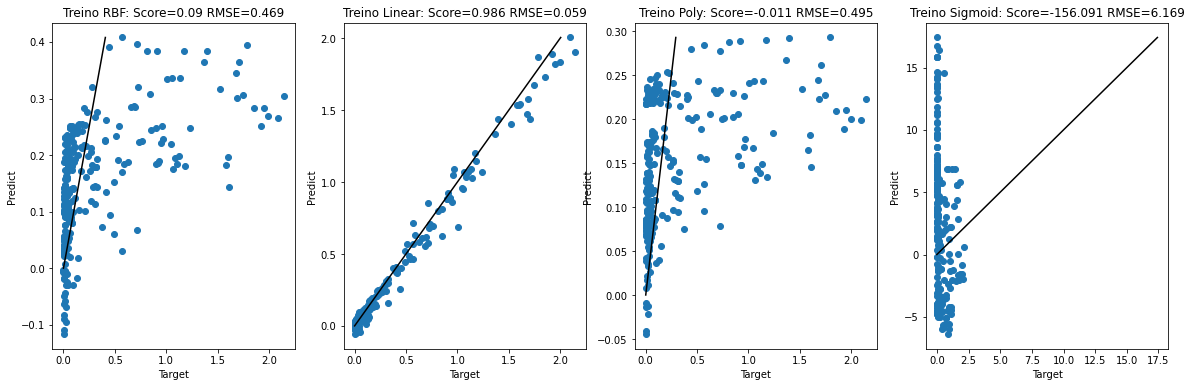

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

ax1.set_title(f'Treino RBF: Score={round(score_rbf, 3)} '
              f'RMSE={round(RMSE_rbf, 3)}')
ax1.scatter(Y_base_teste, y_previsoes_rbf)
ax1.plot([min(Y_base_teste), max(y_previsoes_rbf)], [min(Y_base_teste), max(y_previsoes_rbf)], 'k')
ax1.set_xlabel('Target')
ax1.set_ylabel('Predict')

ax2.set_title(f'Treino Linear: Score={round(score_linear, 3)} '
              f'RMSE={round(RMSE_linear, 3)}')
ax2.scatter(Y_base_teste, y_previsoes_linear)
ax2.plot([min(Y_base_teste), max(y_previsoes_linear)], [min(Y_base_teste), max(y_previsoes_linear)], 'k')
ax2.set_xlabel('Target')
ax2.set_ylabel('Predict')

ax3.set_title(f'Treino Poly: Score={round(score_poly, 3)} '
              f'RMSE={round(RMSE_poly, 3)}')
ax3.scatter(Y_base_teste, y_previsoes_poly)
ax3.plot([min(Y_base_teste), max(y_previsoes_poly)], [min(Y_base_teste), max(y_previsoes_poly)], 'k')
ax3.set_xlabel('Target')
ax3.set_ylabel('Predict')

ax4.set_title(f'Treino Sigmoid: Score={round(score_sigmoid, 3)} '
              f'RMSE={round(RMSE_sigmoid, 3)}')
ax4.scatter(Y_base_teste, y_previsoes_sigmoid)
ax4.plot([min(Y_base_teste), max(y_previsoes_sigmoid)], [min(Y_base_teste), max(y_previsoes_sigmoid)], 'k')
ax4.set_xlabel('Target')
ax4.set_ylabel('Predict')
plt.show()
